In [70]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split


In [71]:
data=pd.read_csv('sbi.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [72]:
data.nunique()

age                 47
sex                  2
bmi                548
children             6
smoker               2
region               4
charges           1337
insuranceclaim       2
dtype: int64

In [73]:
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [74]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [75]:
data.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [76]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

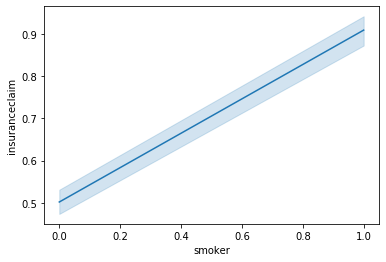

In [77]:
sns.lineplot(x='smoker',y='insuranceclaim',data=data);

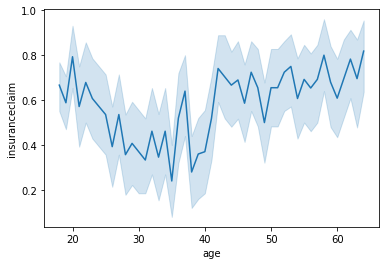

In [78]:
sns.lineplot(x='age',y='insuranceclaim',data=data);

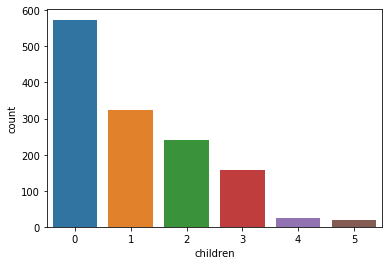

In [79]:
sns.countplot(data['children']);

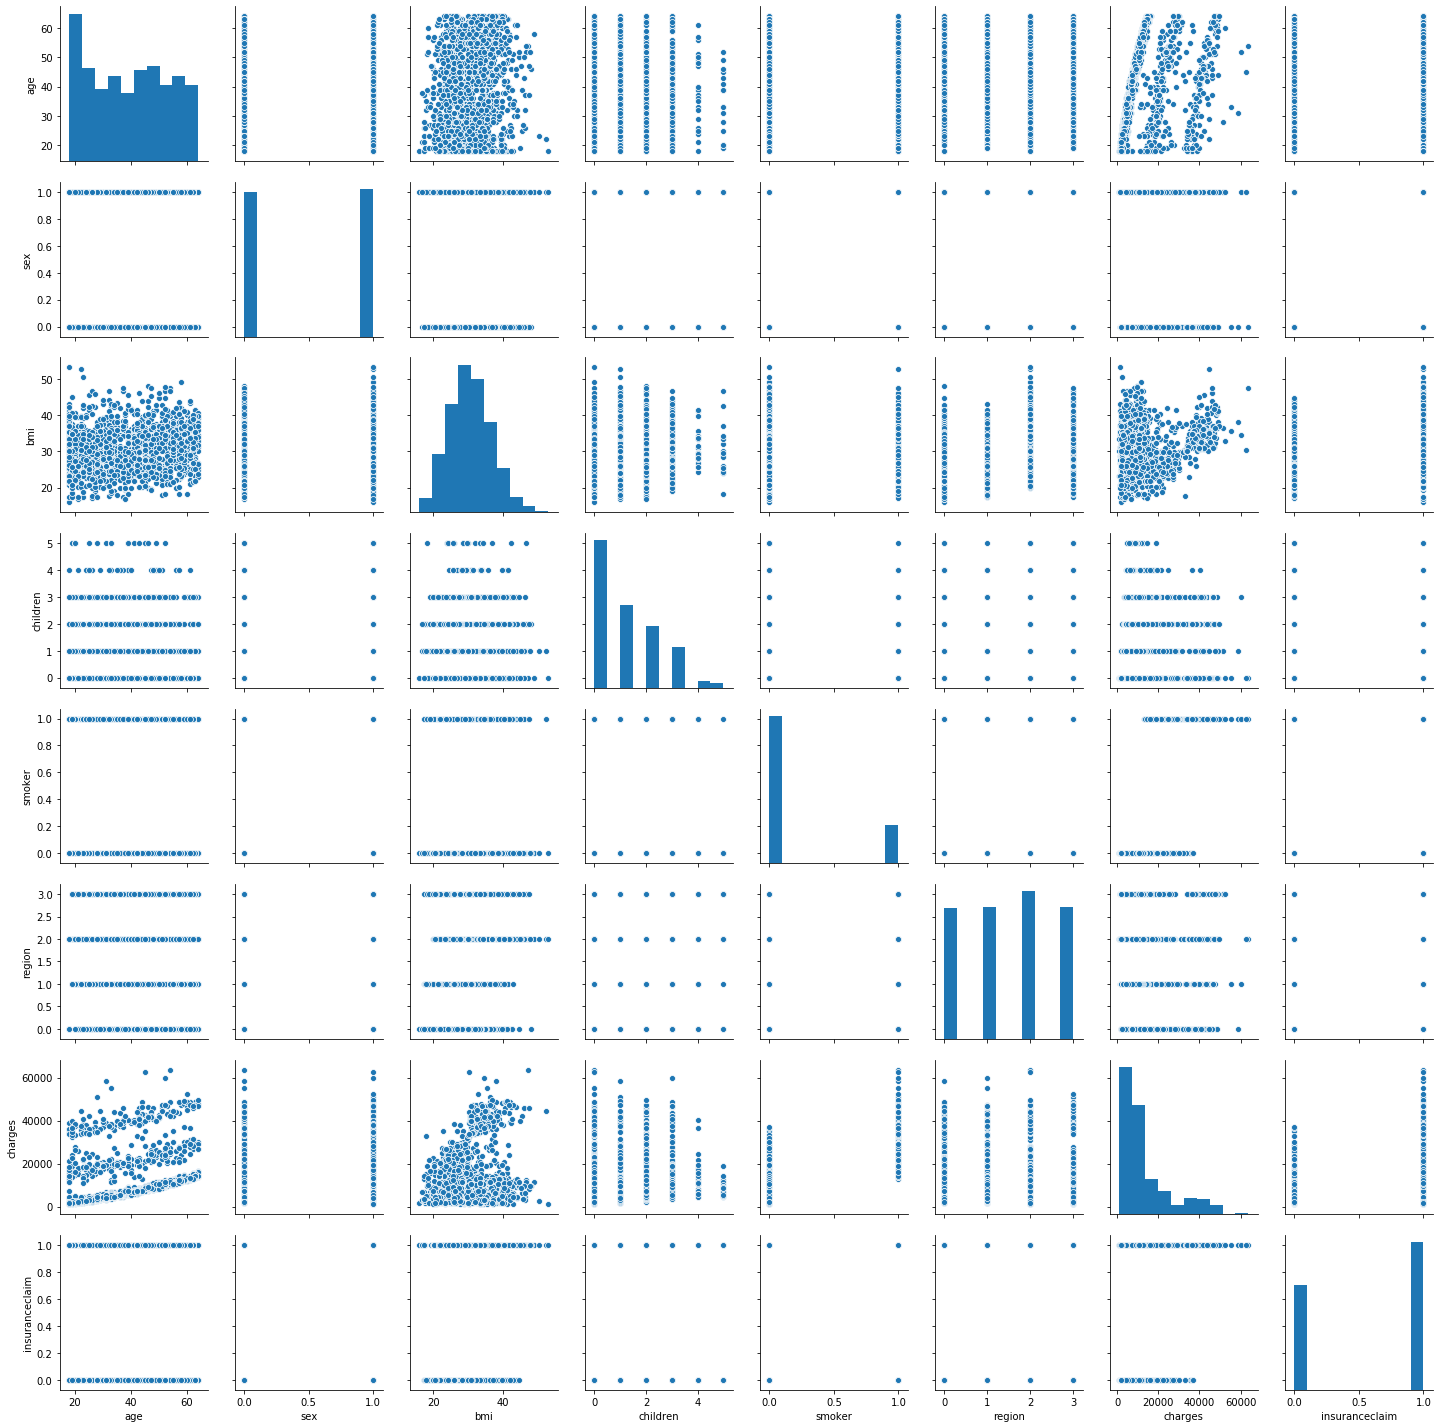

In [80]:
sns.pairplot(data);

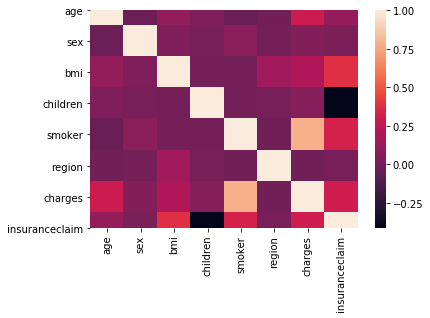

In [81]:
sns.heatmap(data.corr())

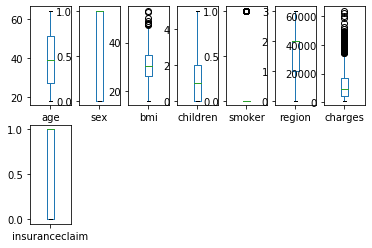

In [82]:
data.plot(kind='box',subplots=True,layout=(2,7));

In [83]:
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
data_final.shape

(1338, 8)


(1309, 8)

In [84]:
data=data_final
data.shape

(1309, 8)

In [85]:
data.skew()

age               0.051340
sex              -0.010708
bmi               0.191432
children          0.738119
smoker            1.482731
region           -0.023027
charges           1.437160
insuranceclaim   -0.352569
dtype: float64

In [86]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.sqrt(data[col])

In [87]:
data.skew()

age               0.051340
sex              -0.010708
bmi               0.191432
children          0.080139
smoker            1.482731
region           -0.023027
charges           0.753701
insuranceclaim   -0.352569
dtype: float64

In [88]:
df_x=data.drop(['insuranceclaim'],axis=1)
y=data['insuranceclaim']
df_x.shape,y.shape

((1309, 7), (1309,))

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
ss=StandardScaler()
x=ss.fit_transform(df_x)

In [91]:
x=pd.DataFrame(data=x)

In [92]:
x.shape

(1309, 7)

In [93]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=106,test_size=.20)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
acc_score=accuracy_score(y_test,y_pred)
print(acc_score)
print('\nconfusion matirx\n',confusion_matrix(y_test,y_pred))

print('\nclassification report',classification_report(y_test,y_pred))

0.916030534351145

confusion matirx
 [[ 97  18]
 [  4 143]]

classification report               precision    recall  f1-score   support

           0       0.96      0.84      0.90       115
           1       0.89      0.97      0.93       147

    accuracy                           0.92       262
   macro avg       0.92      0.91      0.91       262
weighted avg       0.92      0.92      0.92       262



In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [96]:
lr_train_auc=roc_auc_score(y_test,y_pred)
lr_test_auc=roc_auc_score(y_test,y_pred)


In [97]:
lr_train_auc,lr_test_auc

(0.9081336882579119, 0.9081336882579119)

In [98]:
lr_train_probs=lr.predict_proba(x_train)
lr_test_probs=lr.predict_proba(x_test)
lr_train_probs=lr_train_probs[:,1]
lr_test_probs=lr_test_probs[:,1]

In [100]:
lr_train_fpr,lr_train_tpr,train_threshold=roc_curve(y_train,lr_train_probs)
lr_test_fpr,lr_test_tpr,test_threshold=roc_curve(y_test,lr_test_probs)

No handles with labels found to put in legend.


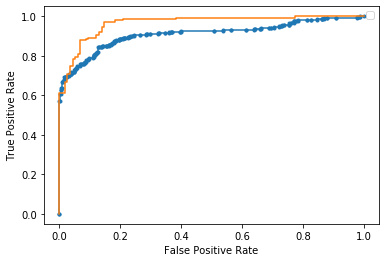

In [108]:
plt.plot(lr_train_fpr,lr_train_tpr,marker='.')
plt.plot(lr_test_fpr,lr_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('Accuracy score is\n :',accuracy_score(y_test,y_pred))
print('\nConfusion matirx is :\n',confusion_matrix(y_test,y_pred))
print('\nClassification report is :',classification_report(y_test,y_pred))


Accuracy score is
 : 0.9732824427480916

Confusion matirx is :
 [[113   2]
 [  5 142]]

Classification report is :               precision    recall  f1-score   support

           0       0.96      0.98      0.97       115
           1       0.99      0.97      0.98       147

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262



In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('Accuracy score is\n :',accuracy_score(y_test,y_pred))
print('\nConfusion matirx is :\n',confusion_matrix(y_test,y_pred))
print('\nClassification report is :',classification_report(y_test,y_pred))


Accuracy score is
 : 0.9732824427480916

Confusion matirx is :
 [[113   2]
 [  5 142]]

Classification report is :               precision    recall  f1-score   support

           0       0.96      0.98      0.97       115
           1       0.99      0.97      0.98       147

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262



In [27]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print('Accuracy score is\n :',accuracy_score(y_test,y_pred))
print('\nConfusion matirx is :\n',confusion_matrix(y_test,y_pred))
print('\nClassification report is :',classification_report(y_test,y_pred))


Accuracy score is
 : 0.767175572519084

Confusion matirx is :
 [[100  15]
 [ 46 101]]

Classification report is :               precision    recall  f1-score   support

           0       0.68      0.87      0.77       115
           1       0.87      0.69      0.77       147

    accuracy                           0.77       262
   macro avg       0.78      0.78      0.77       262
weighted avg       0.79      0.77      0.77       262



In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
print('Accuracy score is\n :',accuracy_score(y_test,y_pred))
print('\nConfusion matirx is :\n',confusion_matrix(y_test,y_pred))
print('\nClassification report is :',classification_report(y_test,y_pred))



Accuracy score is
 : 0.9541984732824428

Confusion matirx is :
 [[108   7]
 [  5 142]]

Classification report is :               precision    recall  f1-score   support

           0       0.96      0.94      0.95       115
           1       0.95      0.97      0.96       147

    accuracy                           0.95       262
   macro avg       0.95      0.95      0.95       262
weighted avg       0.95      0.95      0.95       262



In [29]:
from sklearn.svm import SVC

svc = SVC(kernel='poly')
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Accuracy score is\n :',accuracy_score(y_test,y_pred))
print('\nConfusion matirx is :\n',confusion_matrix(y_test,y_pred))
print('\nClassification report is :',classification_report(y_test,y_pred))



Accuracy score is
 : 0.9427480916030534

Confusion matirx is :
 [[110   5]
 [ 10 137]]

Classification report is :               precision    recall  f1-score   support

           0       0.92      0.96      0.94       115
           1       0.96      0.93      0.95       147

    accuracy                           0.94       262
   macro avg       0.94      0.94      0.94       262
weighted avg       0.94      0.94      0.94       262



In [30]:
from sklearn.ensemble import GradientBoostingClassifier
abc=GradientBoostingClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict(x_test)
print('Accuracy score is\n :',accuracy_score(y_test,predabc))
print('\nConfusion matirx is :\n',confusion_matrix(y_test,predabc))
print('\nClassification report is :',classification_report(y_test,predabc))



Accuracy score is
 : 0.9770992366412213

Confusion matirx is :
 [[114   1]
 [  5 142]]

Classification report is :               precision    recall  f1-score   support

           0       0.96      0.99      0.97       115
           1       0.99      0.97      0.98       147

    accuracy                           0.98       262
   macro avg       0.98      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262



In [31]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=45,learning_rate=0.1,max_depth=10,colsample_bytree=1)
xgb.fit(x_train,y_train)
predxgb=xgb.predict(x_test)
print('Accuracy score is\n :',accuracy_score(y_test,predxgb))
print('\nConfusion matirx is :\n',confusion_matrix(y_test,predxgb))
print('\nClassification report is :',classification_report(y_test,predxgb))


Accuracy score is
 : 1.0

Confusion matirx is :
 [[115   0]
 [  0 147]]

Classification report is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       147

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262



In [109]:
from sklearn.externals import joblib
joblib.dump(xgb,'sbi_insurance.pk1')

['sbi_insurance.pk1']

In [110]:

name=['DecisionTree','SVC','Guassian','KNN','RandomForest','GradientBooster','XGBC']
scr=[.973,.94,.74,.9732,.95,.97,1]

In [111]:
dict={'Name':name,'Score':scr}
df=pd.DataFrame(dict)
df

,Name,Score
0,DecisionTree,0.9730
1,SVC,0.9400
2,Guassian,0.7400
3,KNN,0.9732
4,RandomForest,0.9500
5,GradientBooster,0.9700
6,XGBC,1.0000


In [112]:
df.to_csv('sbi project2.csv')